In [1]:
# ARIMA on Time Pivot table of USDA Production Values 1998-2012
## Sara Slocum

In [104]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

In [105]:
# Importing dataframe
Global = pd.read_csv("C:/Users/saslo/Data_Science/DS_Portfolio/Queen_Bees/Datasets/Wrangled_Data/pivotedGlobal.csv")

Global

,Unnamed: 0,Year,"Almonds, Shelled Basis","Apples, Fresh",Barley,"Coffee, Green",Corn,"Dairy, Milk, Fluid","Grapefruit, Fresh","Meat, Swine",Oats,"Oil, Soybean","Oilseed, Rapeseed",Rye,"Walnuts, Inshell Basis"
0,0,1998,235884.0,5282724.0,2.358840e+08,1.415304e+07,4.822010e+09,3.261510e+08,1.850000e+05,4.740312e+12,2.478820e+08,4.176508e+09,5.214000e+06,2.114000e+06,205931.0
1,1,1999,377800.0,5746060.0,3.613620e+08,2.168172e+07,4.800686e+09,7.753400e+07,1.830000e+05,4.476775e+12,2.395490e+08,3.797778e+09,6.622500e+08,2.165000e+06,256734.0
2,2,2000,318900.0,5675890.0,3.037000e+08,1.822200e+07,4.274204e+09,3.320920e+08,1.630000e+05,2.395490e+11,2.518540e+08,3.946939e+09,3.073860e+08,1.707000e+06,216816.0
3,3,2001,376500.0,5065060.0,3.764880e+08,2.258928e+07,3.866379e+09,3.053190e+08,1.630000e+05,2.518540e+11,2.413770e+08,4.354875e+09,3.121800e+08,1.684000e+06,276700.0
4,4,2002,494416.0,4605810.0,4.944160e+08,2.686065e+11,3.988483e+09,8.358100e+07,1.860000e+05,3.871860e+11,2.277670e+08,4.433333e+09,3.320920e+08,2.096000e+06,255825.0
5,5,2003,471740.0,4780600.0,4.585820e+08,2.775984e+10,4.740312e+09,8.782000e+06,1.460000e+05,5.282724e+12,2.562780e+08,4.113333e+09,3.066520e+08,3.320920e+08,295741.0
6,6,2004,462664.0,5683040.0,4.626640e+08,2.323116e+10,4.476775e+09,9.331000e+06,4.463810e+09,3.037000e+11,2.999140e+08,4.287885e+09,5.080200e+08,9.335000e+06,294834.0
7,7,2005,415040.0,5261960.0,3.871860e+08,2.168172e+10,4.734966e+09,9.247000e+06,8.781000e+06,4.822010e+12,2.822600e+08,4.183484e+09,8.028600e+07,4.585820e+08,322100.0
8,8,2006,508023.0,5351610.0,5.282724e+09,3.169634e+11,4.473878e+09,3.610910e+08,9.392000e+06,4.800686e+12,2.957410e+08,4.227338e+09,6.304900e+08,4.699002e+09,317515.0
9,9,2007,630500.0,4154195.0,4.780600e+09,2.880412e+11,4.408118e+09,3.454860e+08,3.290590e+08,4.274204e+12,4.567846e+09,4.150400e+08,6.804000e+08,4.354875e+09,297600.0


In [106]:
# Isolating almonds for ARIMA
justalmonds = Global[['Year', 'Almonds, Shelled Basis']]

In [107]:
# Formatting Year to date datatype 
justalmonds['Year'] = justalmonds['Year'].astype(str)

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/689320624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Year'] = justalmonds['Year'].astype(str)


In [108]:
justalmonds['Year'] = justalmonds['Year'].apply(lambda s: s+"-01-01")

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/3013753175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Year'] = justalmonds['Year'].apply(lambda s: s+"-01-01")


In [109]:
justalmonds['Year'] = pd.to_datetime(justalmonds.Year) 
justalmonds.head()

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/522262384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Year'] = pd.to_datetime(justalmonds.Year)


,Year,"Almonds, Shelled Basis"
0,1998-01-01,235884.0
1,1999-01-01,377800.0
2,2000-01-01,318900.0
3,2001-01-01,376500.0
4,2002-01-01,494416.0


In [110]:
justalmonds['Year'] = justalmonds['Year'].dt.year
justalmonds.head()

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/2042324752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Year'] = justalmonds['Year'].dt.year


,Year,"Almonds, Shelled Basis"
0,1998,235884.0
1,1999,377800.0
2,2000,318900.0
3,2001,376500.0
4,2002,494416.0


In [111]:
## Setting Year as index
justalmonds.set_index('Year', inplace=True)

<AxesSubplot:xlabel='Year'>

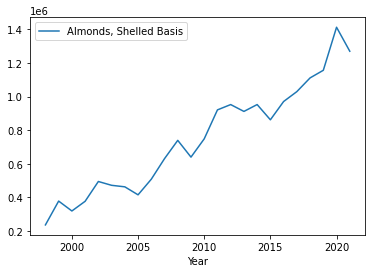

In [112]:
## Looking at linear plot of almond production
justalmonds.plot()

In [113]:
## Linear plot does not look stationary, there seems to be an obvious upward trend in Almond production 

In [50]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(justalmonds['Almonds, Shelled Basis'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -0.23076651018098684
n_lags: 0.9347535822425852
p-value: 0.9347535822425852
Critial Values:
   1%, -3.9240193847656246
Critial Values:
   5%, -3.0684982031250003
Critial Values:
   10%, -2.67389265625


In [55]:
## Much to my expectation, the results of our ADF test is that our data is non-stationary. We must fail to reject the Null hypothesis as our p-value is not significant
## and our ADF Statistic is higher than our critical values. In other words, the Almond time series production data from 1998-2021 has some time-dependent structure 
## and does not have constant variance over time.

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/207175417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['1difference']=justalmonds['Almonds, Shelled Basis']-justalmonds['Almonds, Shelled Basis'].shift(1)


<AxesSubplot:xlabel='Year'>

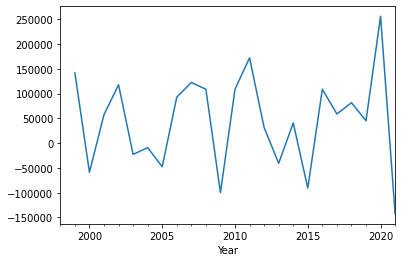

In [65]:
## Transforming Non-Stationary to Stationary using Differencing
justalmonds['1difference']=justalmonds['Almonds, Shelled Basis']-justalmonds['Almonds, Shelled Basis'].shift(1)
justalmonds['1difference'].plot()

In [71]:
### Non-Stationary trend seems to be removed, let's verify with another ADF test...

In [67]:
## Adjusted data ADF Test
result=adfuller(justalmonds['1difference'].dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -3.7640959226302253
n_lags: 0.0032967788432624826
p-value: 0.0032967788432624826
Critial Values:
   1%, -3.9240193847656246
Critial Values:
   5%, -3.0684982031250003
Critial Values:
   10%, -2.67389265625


In [68]:
### Our p-value is significant!! Therefore, our new column of data with 1-differencing applied has removed the time-series component and is now stationary. 
### We are able to proceed with our ARIMA analysis, and set our d value to 1.

C:\Users\saslo\AppData\Local\Temp/ipykernel_24552/3496822351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Seasonal_Difference']=justalmonds['Almonds, Shelled Basis']-justalmonds['Almonds, Shelled Basis'].shift(24)


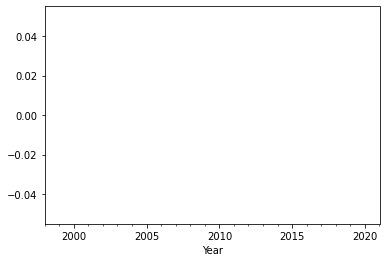

In [70]:
## Computing seasonal differences
justalmonds['Seasonal_Difference']=justalmonds['Almonds, Shelled Basis']-justalmonds['Almonds, Shelled Basis'].shift(24)
ax=justalmonds['Seasonal_Difference'].plot()